# Réseau de Neurone

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('ggplot')

## 1. Dataset

Shape de X: (100, 2)
Sshape de y: (100, 1)


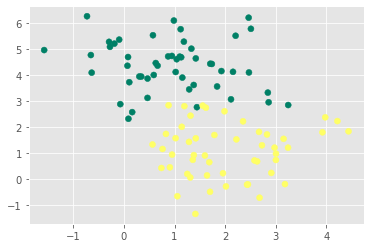

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f'Shape de X: {X.shape}\nSshape de y: {y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

## 2. Initialisation des Paramètres

In [5]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [6]:
W, b = initialisation(X)

In [7]:
W

array([[-0.32266554],
       [ 1.31988014]])

In [8]:
b

array([0.38064885])

## 3. Modèle

In [14]:
def modele(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [15]:
A = modele(X, W, b)

In [16]:
A.shape

(100, 1)

## 4. Fonction Coût

In [19]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - A) * np.log(1 - A))

In [20]:
Loss = log_loss(A, y)

In [21]:
Loss

0.36612789658550254

## 5. Gradients

In [36]:
def gradients(X, A, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [37]:
dW, db = gradients(X, A, y)

In [38]:
dW.shape, dW

((2, 1),
 array([[0.15750018],
        [2.1100815 ]]))

In [39]:
db.shape, db

((), 0.34824646699456935)

## 6. Mise à Jour

In [40]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [41]:
W,b

(array([[-0.33999056],
        [ 1.08777117]]),
 array([0.34234173]))

In [42]:
W, b = update(dW, db, W, b, 0.01)
W, b

(array([[-0.34156556],
        [ 1.06667036]]),
 array([0.33885927]))

In [50]:
from sklearn.metrics import accuracy_score

In [116]:
def predict(X, W, b):
    y_pred = modele(X, W, b)
    # print(y_pred)
    return y_pred >= 0.5

## 7. Entrainement du Modèle

In [117]:
def train_cnn(X, y, learning_rate=0.1, epochs=100):
    ## Initialisation
    W, b = initialisation(X)
    
    Loss = []
    
    for i in range(epochs):
        
        A = modele(X, W, b)
        
        Loss.append(log_loss(A, y))
        
        dW, db = gradients(X, A, y)
        
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(f'Score: {accuracy_score(y, y_pred)}')
        
    plt.plot(Loss)
    
    return W, b

Score: 0.89


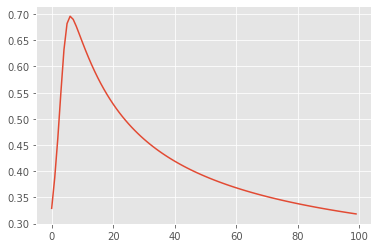

In [118]:
W, b = train_cnn(X, y)

## 8. Frontiere de décision

In [119]:
new_plant = np.array([2, 1])

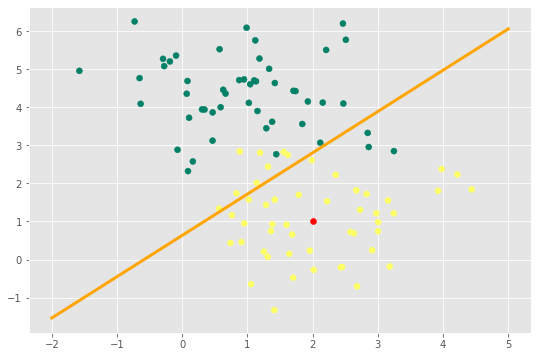

In [120]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
ax.scatter(new_plant[0], new_plant[1], c='r')

x1 = np.linspace(-2, 5, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

In [122]:
predict(new_plant, W, b)

array([ True])

## 9. Visualisations 3D

In [123]:
import plotly.graph_objects as go

In [124]:
# fig = go.Figure(data=[go.Scatter3d( 
#     x=X[:, 0].flatten(),
#     y=X[:, 1].flatten(),
#     z=y.flatten(),
#     mode='markers',
#     marker=dict(
#         size=5,
#         color=y.flatten(),                
#         colorscale='YlGn',  
#         opacity=0.8,
#         reversescale=True
#     )
# )])

# fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
# fig.layout.scene.camera.projection.type = "orthographic"
# fig.show()

In [125]:
# X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
# X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
# xx0, xx1 = np.meshgrid(X0, X1)
# Z = W[0] * xx0 + W[1] * xx1 + b
# A = 1 / (1 + np.exp(-Z))

# fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

# fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


# fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
# fig.layout.scene.camera.projection.type = "orthographic"
# fig.show()

In [126]:
from utilities import *

In [127]:
X_train, y_train, X_test, y_test = load_data()

In [128]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


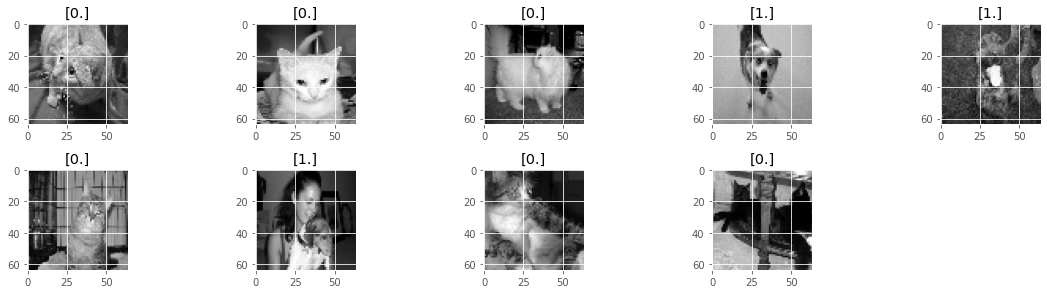

In [130]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show();

## Flattern les images

In [106]:
X_train_flattern = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flattern = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [137]:
X_train_flattern = X_train_flattern/250

In [138]:
X_test_flattern.shape

(200, 4096)

<ipython-input-19-e6e8d9ed3ae2>:2: RuntimeWarning:

divide by zero encountered in log

<ipython-input-19-e6e8d9ed3ae2>:2: RuntimeWarning:

invalid value encountered in multiply



Score: 0.528


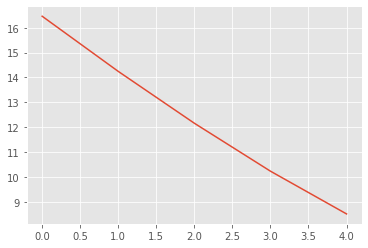

In [141]:
W_image, b_image = train_cnn(X_train_flattern, y_train, 0.01, 150)